### Analise Explorat√≥ria

#### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [147]:
df = pd.read_csv("eta.csv", encoding="latin1", sep=";")
display(df.columns)
pd.set_option("display.max_columns", None)

C:\Users\guilhermetsouza-ieg\AppData\Local\Temp\ipykernel_21696\4294403942.py:1: DtypeWarning: Columns (5,6,7,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eta.csv", encoding="latin1", sep=";")


Index(['Regi√£o Geogr√°fica', 'UF', 'Regional de Sa√∫de', 'Munic√≠pio',
       'C√≥digo IBGE', 'Tipo da Institui√ß√£o', 'Sigla da Institui√ß√£o',
       'Nome da Institui√ß√£o', 'CNPJ da Institui√ß√£o',
       'Nome do escrit√≥rio regional/local',
       'CNPJ do escrit√≥rio regional/local', 'Tipo da Forma de Abastecimento',
       'C√≥digo Forma de abastecimento', 'Nome da Forma de Abastecimento',
       'Nome da ETA', 'Ano de refer√™ncia', 'Data de registro no Sisagua',
       'Data de preenchimento', 'Capta√ß√£o superficial', 'Capta√ß√£o subterr√¢nea',
       'Capta√ß√£o de √Ågua de chuva', 'CEP', 'Endere√ßo', 'N√∫mero', 'DDD',
       'Telefone', 'EMAIL', 'Tempo m√©dio di√°rio de funcionamento',
       'Etapa pre-oxida√ß√£o', 'Etapa mistura r√°p. e coag.', 'Etapa flocula√ß√£o',
       'Etapa decanta√ß√£o', 'Etapa flota√ß√£o', 'Tipo de filtra√ß√£o',
       'N√∫mero de filtros',
       'Impedimento de monitoramento por unidade filtrante',
       'Etapa desinfec√ß√£o', 'Desinf. com clo

#### Entendimento Geral sobre o Dataset


In [148]:
df = df[['Vaz√£o de √°gua tratada', 'Regi√£o Geogr√°fica', 'Tipo da Institui√ß√£o',
        'Ano de refer√™ncia', 'Data de registro no Sisagua',
         'Data de preenchimento', 'Tipo de filtra√ß√£o', 'N√∫mero de filtros', 'UF']]

# Quantidade de linhas e colunas
print(df.shape)

df.isna().sum().sort_values(ascending=False).head(20)

if "N√∫mero de filtros" in df.columns:
    df["N√∫mero de filtros"] = df["N√∫mero de filtros"].fillna(0)

if "Tipo da Institui√ß√£o" in df.columns:
    df["Tipo da Institui√ß√£o"] = df["Tipo da Institui√ß√£o"].fillna("N√£o informado")

# Drop nas linhas que o tipo de filtra√ß√£o est√° como Sem Filtra√ß√£o
df = df[df["Tipo de filtra√ß√£o"] != "SEM FILTRA√á√ÉO"]

# Quantidade de linhas e colunas ap√≥s tratamento de NaN
print(df.shape)

(881760, 9)
(92104, 9)


In [ ]:
display(df.head())

Vaz√£o de √°gua tratada Regi√£o Geogr√°fica Tipo da Institui√ß√£o  \
0                      247.20          NORDESTE            Regional   
1                       56.80               SUL            Regional   
5                       50.30               SUL            Regional   
6                      136.00               SUL            Regional   
8                       30.00               SUL            Regional   
...                       ...               ...                 ...   
881729                    NaN          NORDESTE       N√£o informado   
881751                   0.25             NORTE       N√£o informado   
881752                   1.00             NORTE       N√£o informado   
881755                    NaN             NORTE       N√£o informado   
881757                   0.25             NORTE       N√£o informado   

        Ano de refer√™ncia Data de registro no Sisagua  \
0                    2014     2014/02/18 14:12:25.000   
1                    2014     2014/03/28 13:10:33.000   
5                    2014     2014/03/28 15:55:40.000   
6                    2014     2014/03/28 15:55:40.000   
8                    2014     2014/03/28 16:53:42.000   
...                   ...                         ...   
881729               2025     2025/01/14 13:08:48.000   
881751               2025     2025/02/20 09:17:58.000   
881752               2025     2025/02/20 09:29:47.000   
881755               2025     2025/02/20 10:06:03.000   
881757               2025     2025/02/20 11:20:14.000   

          Data de preenchimento       Tipo de filtra√ß√£o  N√∫mero de filtros  UF  
0       2014/02/18 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                4.0  AL  
1       2014/03/28 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                7.0  RS  
5       2014/03/28 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                6.0  RS  
6       2014/03/28 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                3.0  RS  
8       2014/03/28 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                2.0  RS  
...                         ...                     ...                ...  ..  
881729  2025/01/14 00:00:00.000  FILTRA√á√ÉO EM MEMBRANAS                0.0  PB  
881751  2025/02/20 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                1.0  PA  
881752  2025/02/20 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                1.0  PA  
881755  2025/02/20 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                2.0  PA  
881757  2025/02/20 00:00:00.000        FILTRA√á√ÉO R√ÅPIDA                2.0  PA  

[92104 rows x 9 columns]

In [150]:
display(df['N√∫mero de filtros'].value_counts())

N√∫mero de filtros
1.0      32582
2.0      18598
4.0      13044
3.0       9246
5.0       4503
6.0       3682
8.0       2813
0.0       1528
10.0      1288
14.0       834
12.0       796
9.0        709
7.0        679
16.0       353
11.0       177
13.0       168
20.0       160
24.0       122
15.0       121
18.0        98
17.0        73
30.0        44
19.0        39
59.0        32
33.0        31
49.0        26
32.0        24
94.0        23
25.0        23
26.0        22
35.0        21
34.0        21
29.0        21
22.0        18
28.0        18
99.0        17
50.0        17
23.0        17
48.0        13
65.0        12
43.0        11
44.0        10
38.0         9
21.0         9
60.0         8
64.0         6
31.0         6
40.0         5
62.0         4
124.0        4
72.0         4
27.0         3
68.0         3
131.0        2
200.0        2
121.0        2
108.0        1
115.0        1
141.0        1
Name: count, dtype: int64

In [ ]:
print(df.info())
print(df.describe())

(92104, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 92104 entries, 0 to 881757
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vaz√£o de √°gua tratada        73932 non-null  float64
 1   Regi√£o Geogr√°fica            92104 non-null  object 
 2   Tipo da Institui√ß√£o          92104 non-null  object 
 3   Ano de refer√™ncia            92104 non-null  int64  
 4   Data de registro no Sisagua  92104 non-null  object 
 5   Data de preenchimento        92104 non-null  object 
 6   Tipo de filtra√ß√£o            92104 non-null  object 
 7   N√∫mero de filtros            92104 non-null  float64
 8   UF                           92104 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.0+ MB
None
       Vaz√£o de √°gua tratada  Ano de refer√™ncia  N√∫mero de filtros
count           73932.000000       92104.000000       92104.000000
mean              240.843910    

##### Quantidade de Institui√ß√µes por Estado

In [152]:
print(df["UF"].value_counts())

UF
SP    15919
MG    14216
CE     8345
BA     6581
PE     5319
ES     4784
SC     4601
RS     4375
PA     4031
RJ     3368
PR     3199
GO     2669
PB     2551
MT     1905
RN     1544
TO     1458
PI     1295
MA     1282
RO      940
AM      933
SE      932
AL      814
MS      287
AP      254
AC      242
RR      146
DF      114
Name: count, dtype: int64


##### Distribui√ß√£o Por Estado


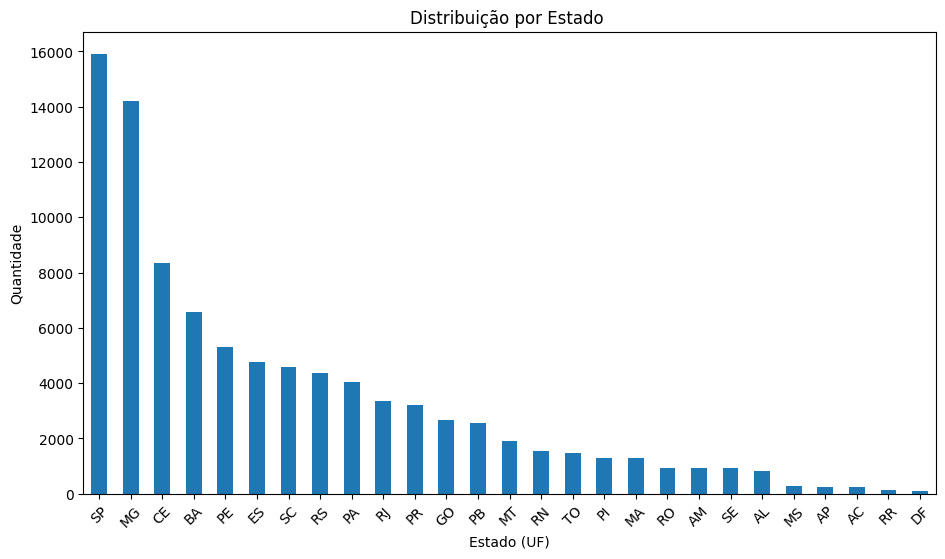

In [153]:
uf_counts = df["UF"].value_counts()

plt.figure(figsize=(11,6))
uf_counts.plot(kind="bar")

plt.title("Distribui√ß√£o por Estado ")
plt.xlabel("Estado (UF)")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


O gr√°fico acima representa a quantidade de ocorr√™ncias (ou registros) em cada Unidade Federativa (UF) do Brasil presente no conjunto de dados.

O eixo X (horizontal) mostra os estados (UF) ‚Äî por exemplo, SP, RJ, MG, etc.

O eixo Y (vertical) indica a quantidade de registros associados a cada estado.

Cada barra representa o total de ocorr√™ncias para uma determinada UF.

As barras mais altas indicam estados com maior n√∫mero de registros, enquanto as mais baixas mostram aqueles com menor participa√ß√£o.

Esse tipo de gr√°fico facilita a compara√ß√£o visual entre os estados, permitindo identificar quais regi√µes t√™m maior representatividade nos dados analisados.

##### Percentual de institui√ß√µes Locais e Regionais


In [154]:
print(df['Tipo da Institui√ß√£o'].value_counts(normalize=True) * 100)

Tipo da Institui√ß√£o
Regional         49.279076
Local            45.965430
N√£o informado     4.755494
Name: proportion, dtype: float64


#### ETAs por regi√£o


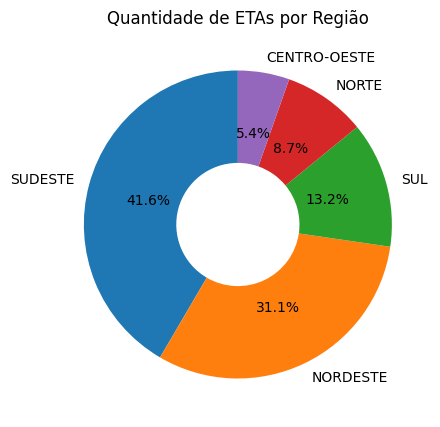

In [155]:
counts = df["Regi√£o Geogr√°fica"].value_counts()

plt.figure(figsize=(8,5))
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'width':0.6})  

plt.title("Quantidade de ETAs por Regi√£o")
plt.show()


O gr√°fico acima apresenta a distribui√ß√£o percentual das ETAs (Esta√ß√µes de Tratamento de √Ågua) entre as diferentes Regi√µes Geogr√°ficas do Brasil.

Cada fatia do gr√°fico de rosca representa uma regi√£o, mostrando sua propor√ß√£o em rela√ß√£o ao total de ETAs.

Formato: Gr√°fico de rosca (pizza com centro vazado)

Eixo: Representa√ß√£o percentual (sem eixo cartesiano)

Legenda: Cada r√≥tulo indica o nome da regi√£o

Interpreta√ß√£o: Regi√µes com fatias maiores possuem maior concentra√ß√£o de ETAs no conjunto de dados

##### Histograma de Vaz√£o de √Ågua Tratata

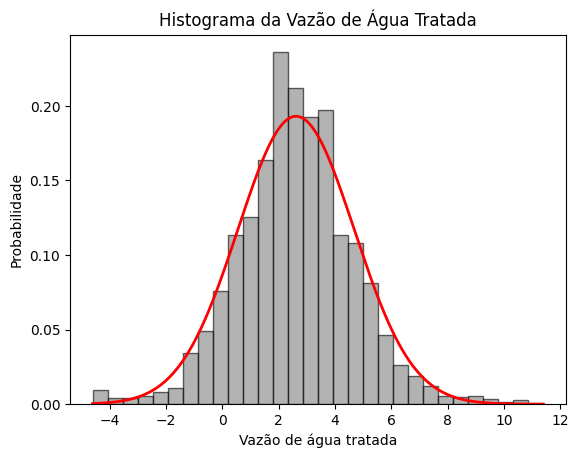

In [156]:
dados = df["Vaz√£o de √°gua tratada"].dropna()
dados = dados[dados > 0]

dados_log = np.log(dados)

plt.hist(dados_log, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

media, desvio = np.mean(dados_log), np.std(dados_log)
x = np.linspace(min(dados_log), max(dados_log), 1000)
pdf = norm.pdf(x, media, desvio)

plt.plot(x, pdf, 'r-', linewidth=2)

plt.xlabel("Vaz√£o de √°gua tratada")
plt.ylabel("Probabilidade")
plt.title("Histograma da Vaz√£o de √Ågua Tratada")
plt.show()


O gr√°fico abaixo mostra a distribui√ß√£o logar√≠tmica da vari√°vel ‚ÄúVaz√£o de √°gua tratada‚Äù.
Esse tipo de an√°lise √© √∫til quando os dados possuem grande varia√ß√£o de magnitude (por exemplo, algumas ETAs tratam muito mais √°gua que outras), tornando o logaritmo uma boa transforma√ß√£o para visualizar melhor o comportamento geral.

üß© Etapas do c√≥digo

Remo√ß√£o de valores nulos e zeros:
Apenas valores positivos e n√£o nulos s√£o considerados.

Transforma√ß√£o logar√≠tmica:
Aplica-se o log natural para reduzir a assimetria dos dados.

Plotagem do histograma:
Mostra a distribui√ß√£o dos valores transformados.

Ajuste da distribui√ß√£o normal:
Uma curva normal (vermelha) √© sobreposta para comparar o formato dos dados com uma distribui√ß√£o te√≥rica normal.

üìà Interpreta√ß√£o

O eixo X representa a vaz√£o de √°gua tratada (em escala logar√≠tmica).

O eixo Y mostra a densidade de probabilidade.

A curva vermelha indica a distribui√ß√£o normal ajustada com base na m√©dia e desvio padr√£o dos dados log-transformados.

Se o histograma se aproxima da curva vermelha, os dados seguem aproximadamente uma distribui√ß√£o log-normal.

##### Vaz√£o m√©dia por regi√£o

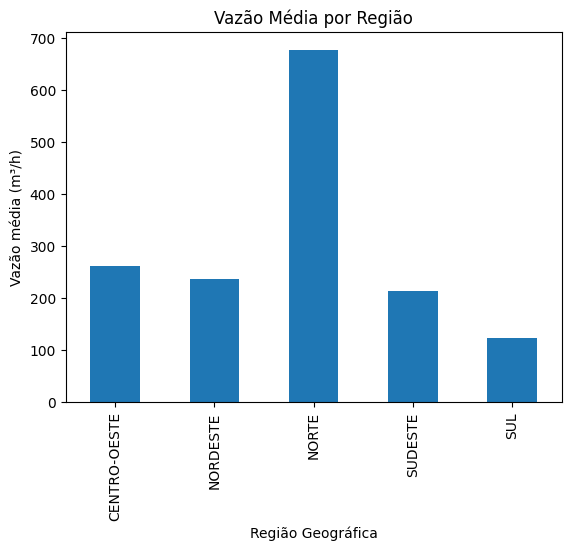

In [157]:
df.groupby("Regi√£o Geogr√°fica")["Vaz√£o de √°gua tratada"].mean().plot(kind="bar")
plt.title("Vaz√£o M√©dia por Regi√£o")
plt.ylabel("Vaz√£o m√©dia (m¬≥/h)")
plt.show()

O gr√°fico acima apresenta a vaz√£o m√©dia de √°gua tratada (em m¬≥/h) em cada Regi√£o Geogr√°fica do Brasil.
Esse tipo de visualiza√ß√£o permite comparar o desempenho m√©dio das Esta√ß√µes de Tratamento de √Ågua (ETAs) entre as regi√µes.

üß© Etapas do c√≥digo

Agrupamento dos dados:
O conjunto √© agrupado pela coluna ‚ÄúRegi√£o Geogr√°fica‚Äù.

C√°lculo da m√©dia:
√â calculada a m√©dia da vaz√£o de √°gua tratada para cada regi√£o.

Plotagem em gr√°fico de barras:
Cada barra representa a vaz√£o m√©dia da respectiva regi√£o.

üìà Interpreta√ß√£o

O eixo X representa as Regi√µes Geogr√°ficas (Norte, Nordeste, Centro-Oeste, Sudeste, Sul).

O eixo Y indica a vaz√£o m√©dia tratada em m¬≥/h.

As barras mais altas mostram regi√µes com maior capacidade m√©dia de tratamento, enquanto as mais baixas indicam menor desempenho m√©dio.

##### Tipos de filtra√ß√£o por regi√£o (barras empilhadas)


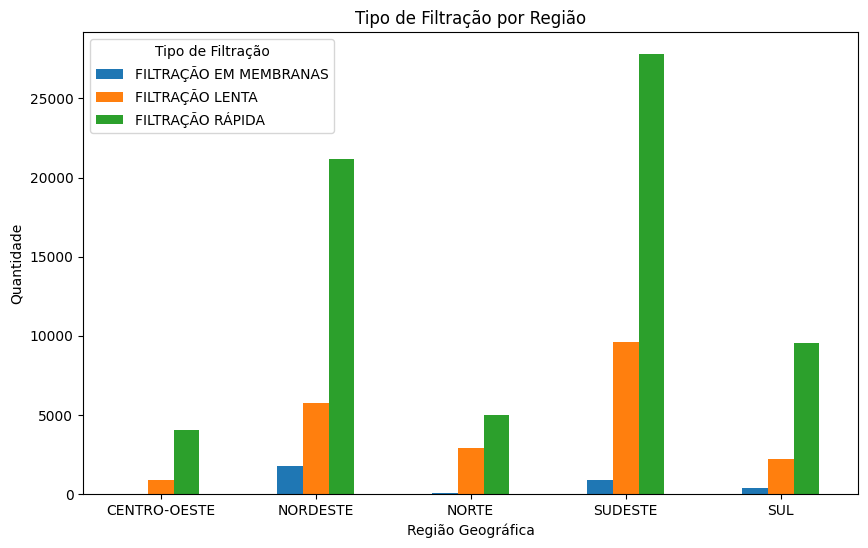

In [158]:
ct = pd.crosstab(df["Regi√£o Geogr√°fica"], df["Tipo de filtra√ß√£o"])

ct.plot(kind="bar", stacked=False, figsize=(10,6))

plt.title("Tipo de Filtra√ß√£o por Regi√£o")
plt.ylabel("Quantidade")
plt.xlabel("Regi√£o Geogr√°fica")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Filtra√ß√£o")
plt.show()

O gr√°fico acim mostra a distribui√ß√£o dos tipos de filtra√ß√£o utilizados nas Esta√ß√µes de Tratamento de √Ågua (ETAs) em cada Regi√£o Geogr√°fica do Brasil.

Ele permite comparar como os diferentes m√©todos de filtra√ß√£o est√£o distribu√≠dos pelo pa√≠s.

üß© Etapas do c√≥digo

Cria√ß√£o de uma tabela cruzada (crosstab):
Conta quantas ETAs existem em cada combina√ß√£o de Regi√£o Geogr√°fica e Tipo de Filtra√ß√£o.

Plotagem do gr√°fico de barras:
Cada grupo de barras representa uma regi√£o e mostra as quantidades de cada tipo de filtra√ß√£o.

Personaliza√ß√£o visual:
Foram adicionados t√≠tulo, r√≥tulos dos eixos, legenda e rota√ß√£o dos r√≥tulos do eixo X para melhor leitura.

üìä Interpreta√ß√£o

O eixo X representa as Regi√µes Geogr√°ficas do Brasil.

O eixo Y mostra a quantidade de ETAs.

Cada cor representa um tipo de filtra√ß√£o (por exemplo: r√°pida, lenta, sem filtra√ß√£o, etc.).

A compara√ß√£o horizontal permite observar quais regi√µes utilizam mais ou menos determinados tipos de filtra√ß√£o.

Se as barras de uma cor espec√≠fica s√£o mais altas em uma regi√£o, isso indica maior preval√™ncia daquele tipo de filtra√ß√£o nessa √°rea.

##### Vaz√£o m√©dia por tipo de institui√ß√£o

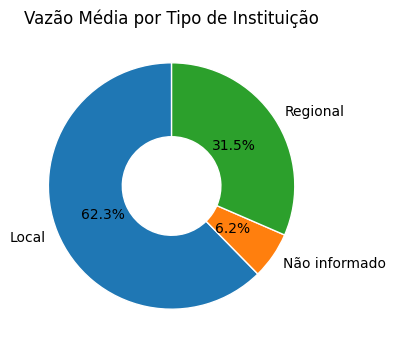

In [159]:
media_vazao = df.groupby("Tipo da Institui√ß√£o")["Vaz√£o de √°gua tratada"].mean()

plt.figure(figsize=(4,4))
plt.pie(
    media_vazao, 
    labels=media_vazao.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'width':0.6, 'edgecolor':'w'}
)
plt.title("Vaz√£o M√©dia por Tipo de Institui√ß√£o")
plt.show()

O gr√°fico acima mostra a propor√ß√£o da vaz√£o m√©dia de √°gua tratada (em m¬≥/h) de acordo com o Tipo de Institui√ß√£o respons√°vel pelas ETAs (Esta√ß√µes de Tratamento de √Ågua).

Cada setor do gr√°fico representa a participa√ß√£o percentual de cada tipo de institui√ß√£o na vaz√£o m√©dia total.

üß© Etapas do c√≥digo

Agrupamento dos dados:
O DataFrame √© agrupado por ‚ÄúTipo da Institui√ß√£o‚Äù.

C√°lculo da m√©dia:
√â calculada a vaz√£o m√©dia de √°gua tratada para cada tipo de institui√ß√£o.

Gera√ß√£o do gr√°fico de rosca:
O gr√°fico √© criado com plt.pie(), utilizando wedgeprops={'width':0.6} para deixar o centro vazado.

R√≥tulos e percentuais:
Cada fatia mostra o nome da institui√ß√£o e sua porcentagem sobre o total.

üìä Interpreta√ß√£o

Cada fatia do gr√°fico representa um tipo de institui√ß√£o (por exemplo: p√∫blica, privada, mista etc.).

O tamanho da fatia indica a contribui√ß√£o m√©dia desse tipo para o total da vaz√£o de √°gua tratada.

Fatia maior ‚Üí maior vaz√£o m√©dia, indicando maior capacidade operacional dessas institui√ß√µes.

##### ETAs cadastradas por ano


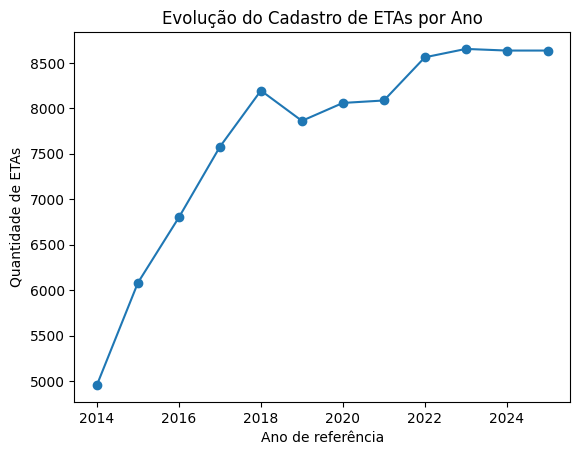

In [160]:
df["Ano de refer√™ncia"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Evolu√ß√£o do Cadastro de ETAs por Ano")
plt.ylabel("Quantidade de ETAs")
plt.show()


O gr√°fico acima mostra a quantidade de Esta√ß√µes de Tratamento de √Ågua (ETAs) cadastradas ao longo dos anos, permitindo observar tend√™ncias hist√≥ricas no cadastro dessas esta√ß√µes.

üß© Etapas do c√≥digo

Contagem por ano:
Conta quantas ETAs existem para cada Ano de refer√™ncia.

Ordena√ß√£o cronol√≥gica:
sort_index() garante que os anos sejam apresentados em ordem crescente.

Plotagem da linha:
O gr√°fico de linha (kind="line") com marcadores (marker="o") facilita a visualiza√ß√£o da varia√ß√£o ano a ano.

üìä Interpreta√ß√£o

O eixo X representa os anos de refer√™ncia do cadastro das ETAs.

O eixo Y indica a quantidade de ETAs cadastradas em cada ano.

Tend√™ncia ascendente indica crescimento no n√∫mero de esta√ß√µes cadastradas ao longo do tempo.

Tend√™ncia descendente ou plat√¥ pode indicar redu√ß√£o ou estabiliza√ß√£o no registro de novas ETAs.

##### Vaz√£o m√©dia por ano

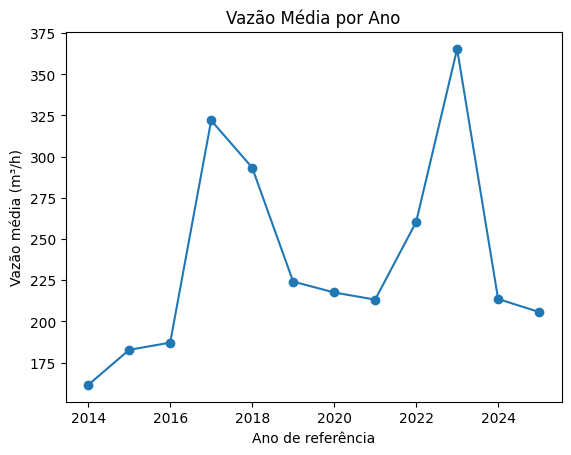

In [161]:
df.groupby("Ano de refer√™ncia")["Vaz√£o de √°gua tratada"].mean().plot(kind="line", marker="o")
plt.title("Vaz√£o M√©dia por Ano")
plt.ylabel("Vaz√£o m√©dia (m¬≥/h)")
plt.show()

O gr√°fico acima mostra a evolu√ß√£o da vaz√£o m√©dia de √°gua tratada (em m¬≥/h) das Esta√ß√µes de Tratamento de √Ågua (ETAs) ao longo dos anos, permitindo acompanhar mudan√ßas na capacidade m√©dia de tratamento.

üß© Etapas do c√≥digo

Agrupamento por ano:
Os dados s√£o agrupados pela coluna ‚ÄúAno de refer√™ncia‚Äù.

C√°lculo da m√©dia:
Calcula-se a vaz√£o m√©dia de √°gua tratada em cada ano.

Plotagem do gr√°fico de linha:
kind="line" com marcadores (marker="o") facilita a visualiza√ß√£o das varia√ß√µes ano a ano.

üìä Interpreta√ß√£o

O eixo X representa os anos de refer√™ncia.

O eixo Y indica a vaz√£o m√©dia tratada (m¬≥/h).

O gr√°fico mostra tend√™ncias de aumento ou diminui√ß√£o da vaz√£o m√©dia, permitindo identificar se as ETAs est√£o tratando mais ou menos √°gua em m√©dia ao longo do tempo.

##### Evolu√ß√£o da Vaz√£o de agua por ano e por regiao

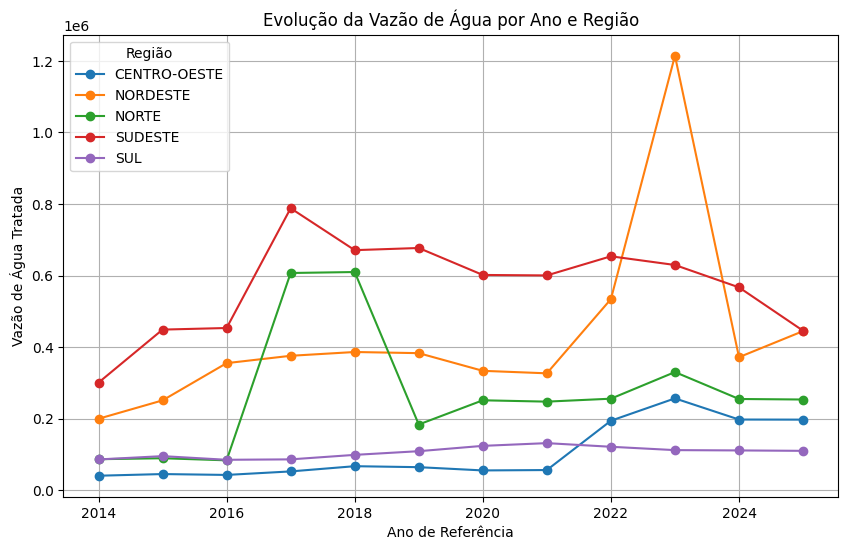

In [162]:
df_grouped = df.groupby(["Ano de refer√™ncia","Regi√£o Geogr√°fica"])["Vaz√£o de √°gua tratada"].sum().reset_index()

df_pivot = df_grouped.pivot(index="Ano de refer√™ncia", columns="Regi√£o Geogr√°fica", values="Vaz√£o de √°gua tratada")

df_pivot.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Evolu√ß√£o da Vaz√£o de √Ågua por Ano e Regi√£o")
plt.xlabel("Ano de Refer√™ncia")
plt.ylabel("Vaz√£o de √Ågua Tratada")
plt.legend(title="Regi√£o")
plt.grid(True)
plt.show()



O gr√°fico acima mostra a evolu√ß√£o da vaz√£o total de √°gua tratada (em m¬≥/h) ao longo dos anos, separada por Regi√£o Geogr√°fica.
Esse tipo de an√°lise permite comparar a capacidade de tratamento de √°gua entre diferentes regi√µes ao longo do tempo.

üß© Etapas do c√≥digo

Agrupamento por ano e regi√£o:
Soma-se a vaz√£o de √°gua tratada para cada combina√ß√£o de Ano de refer√™ncia e Regi√£o Geogr√°fica.

Pivotagem dos dados:
Cria-se uma tabela com anos como √≠ndice e regi√µes como colunas, facilitando a plotagem de m√∫ltiplas linhas.

Plotagem do gr√°fico de linhas:
Cada linha representa uma regi√£o geogr√°fica, com marcadores (marker="o") indicando os valores por ano.

Personaliza√ß√£o:
T√≠tulo, r√≥tulos dos eixos, legenda e grade foram adicionados para melhor interpreta√ß√£o.

üìä Interpreta√ß√£o

O eixo X representa os anos de refer√™ncia.

O eixo Y indica a vaz√£o total de √°gua tratada.

Cada linha colorida mostra a evolu√ß√£o da vaz√£o em uma regi√£o espec√≠fica.

Permite observar quais regi√µes tiveram maior crescimento ou redu√ß√£o na vaz√£o tratada ao longo do tempo.

##### Scatterplot Vaz√£o x N√∫mero de filtros


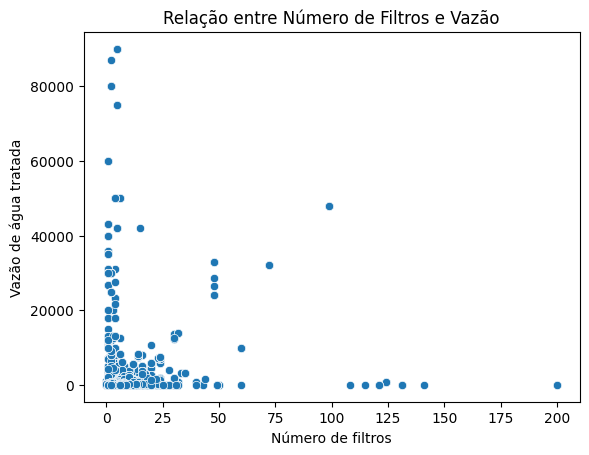

In [163]:
sns.scatterplot(x="N√∫mero de filtros", y="Vaz√£o de √°gua tratada", data=df)
plt.title("Rela√ß√£o entre N√∫mero de Filtros e Vaz√£o")
plt.show()

O gr√°fico acima √© um scatter plot (gr√°fico de dispers√£o) que mostra a rela√ß√£o entre o n√∫mero de filtros em uma ETA e a vaz√£o de √°gua tratada (m¬≥/h).
Esse tipo de gr√°fico √© √∫til para identificar tend√™ncias, padr√µes ou poss√≠veis correla√ß√µes entre duas vari√°veis num√©ricas.

üß© Etapas do c√≥digo

Sele√ß√£o das vari√°veis:
N√∫mero de filtros no eixo X e Vaz√£o de √°gua tratada no eixo Y.

Plotagem do scatter plot:
Cada ponto representa uma ETA individual.

Customiza√ß√£o:
Adiciona-se um t√≠tulo para contextualizar a rela√ß√£o observada.

üìä Interpreta√ß√£o

O eixo X representa o n√∫mero de filtros na esta√ß√£o.

O eixo Y representa a vaz√£o de √°gua tratada.

Distribui√ß√£o dos pontos:

Se os pontos seguem uma tend√™ncia ascendente, indica que mais filtros podem estar associados a maior vaz√£o.

Se os pontos estiverem dispersos sem padr√£o, n√£o h√° rela√ß√£o clara entre as vari√°veis.